Grupo Spider Trap 0 =  7 - 1 - 6
Grupo Spider Trap 1 =  4 - 11 - 14
Grupo Spider Trap 2 =  13 - 8 - 9
Dead End 0 =  2
Dead End 1 =  10
Matriz de Adyacencia
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
Matrices de Power Iteration
Iteración 1:
 [0.057 , 0.0383, 0.0497, 0.0757, 0.0593, 0.057 , 0.0854, 0.0684, 0.04  ,
 0.0213, 0.0684, 0.125 , 0.0967, 0.0474

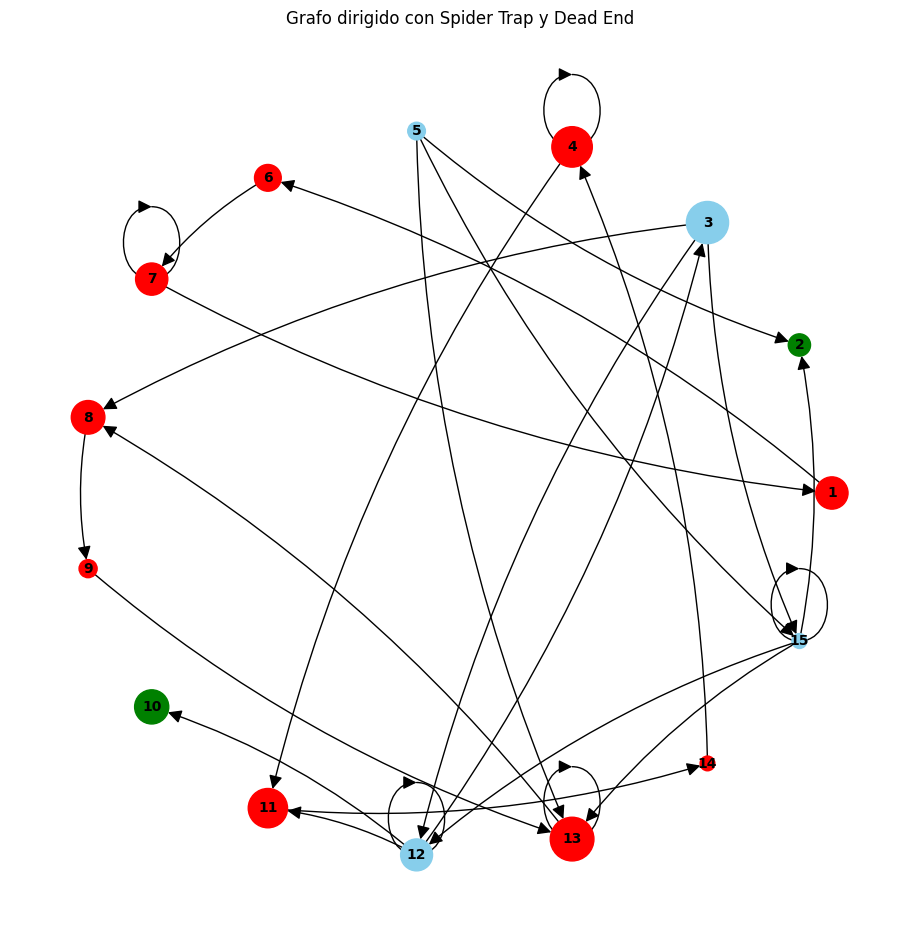

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

nodos_trampa_spider = []
nodos_trampa_dead = []

def create_directed_graph(num_nodes):
    G = nx.DiGraph()
    # Agregar nodos con pesos aleatorios
    nodos = list(range(1, num_nodes + 1))
    for node in nodos:
      weight = random.uniform(0.1, 1.0)
      G.add_node(node, weight=weight)
    return G, nodos

def add_spider_trap(G, nodos):

    for i in range(3):

      spider_trap = random.choice([n for n in nodos if n not in nodos_trampa_dead and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(spider_trap)
      next_node = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(next_node)
      next_node2 = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(next_node2)

      G.add_edge(spider_trap, spider_trap)
      G.add_edge(spider_trap, next_node)
      G.add_edge(next_node, next_node2)
      G.add_edge(next_node2, spider_trap)
      print("Grupo Spider Trap", i , "= ", spider_trap ,"-", next_node ,"-", next_node2)

    return G


def add_dead_end(G, nodos):
    nodo_anterior=0
    for i_ in range(2):
      #print("nodoAnt")
      #print(nodo_anterior)
      dead_end = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead and n is not nodo_anterior])
      nodos_trampa_dead.append(dead_end)
      node = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead and n is not nodo_anterior])

      G.add_edge(node, dead_end)
      nodo_anterior=node
      print("Dead End", i_ ,"= ", dead_end)

    return G


def add_random_edges(G, nodos):
    for n in nodos:
        source = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
        if n not in nodos_trampa_spider and n not in nodos_trampa_dead:
            target = random.choice([n for n in nodos if n != source])
            target2 = random.choice([n for n in nodos if n != source])
            G.add_edge(n, target)
            G.add_edge(n, target2)
            G.add_edge(n, source)
    return G

def draw_graph(G):
    # Crear un diccionario de colores para los nodos
    colors = ['red' if node in nodos_trampa_spider  else 'green' if node in nodos_trampa_dead else 'skyblue' for node in G.nodes]
    weights = [G.nodes[node]['weight'] for node in G.nodes]

    plt.figure(figsize=(9, 9))
    pos = nx.circular_layout(G)
    # Escalar el tamaño de los nodos según el peso
    node_size = [weight * 1000 for weight in weights]

    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=colors, font_size=10, font_color="black", font_weight="bold", arrowsize=20, connectionstyle="arc3,rad=0.1")
    plt.title("Grafo dirigido con Spider Trap y Dead End")

def matriz_adyacencia(G):
    edges = G.edges()
    for i in range(num_nodes):
      row = []
      for j in range(num_nodes):
          row.append(0)
      matriz.append(row)

    for edge in edges:
        row = edge[0]
        col = edge[1]
        matriz[row - 1][col - 1] = 1
        matriz[col - 1][row - 1] = 1
    print("Matriz de Adyacencia")
    for i in range(1):
      for row in matriz:
        print(row)

    return matriz

def matriz_transicion(G):
    matriz_ady = np.array(matriz_adyacencia(G), dtype=float)
    # Normalizar las filas para que sumen 1
    suma_col = matriz_ady.sum(axis=0, keepdims=True)
    matriz_transicion = matriz_ady / suma_col
    # Redondear a 3 decimales
    matriz_transicion_redondeada = np.round(matriz_transicion, 2)
    return matriz_transicion_redondeada

import numpy as np

def power_iteration_with_trace(matriz_transicion, d=0.85, teleport_moments=None, verbose = False):
    """
    Realiza Power Iteration con trazabilidad del vector r y simulación de teletransportación.

    :param matriz_transicion: Matriz de transición del grafo.
    :param d: Factor de amortiguamiento.
    :param teleport_moments: Lista de momentos (iteraciones) en los que se simula la teletransportación.
    :param verbose: Bool para que se imprima el trace


    Ejemplo de uso de simul teleportacion:
    teleport_moments = [2, 5, 8]  # Ejemplo de momentos de teletransportación (iteraciones específicas)

    Ejemplo de uso en codigo:
    trace = power_iteration_with_trace(matriz_transicion, d=0.85, teleport_moments=teleport_moments, verbose = False)
    Para visualizar la evolución de r, puedes imprimir o explorar la lista 'trace' usando verbose = True
    """
    N = matriz_transicion.shape[0]
    r = np.ones(N) / N  # Vector inicial uniformemente distribuido
    trace = [r.copy()]  # Almacenar el estado inicial de r

    tolerance = 1e-4 #tolerancia de cambio
    delta = tolerance + 1
    iter = 0

    while delta > tolerance:
      iter += 1
      if teleport_moments and iter in teleport_moments:
        # Simular la teletransportación ajustando el vector r uniformemente
        r_new = np.ones(N) / N
      else:
        r_new = d * np.dot(matriz_transicion, r) + (1 - d) / N

      delta = np.linalg.norm(r_new - r , 1)

      if verbose:
            r_str = np.array2string(r_new, precision=4, separator=', ', suppress_small=True)
            print(f"Iteración {iter}:\n {r_str}\nCambio: {delta}")

      r = r_new.copy()

    return trace #lista de vectores r para cada momento t.


beta = 0.8
row_num = 15
col_num = 15
matriz = []
num_nodes = 15  #nodos
G, nodos = create_directed_graph(num_nodes)

G = add_spider_trap(G, nodos)
G = add_dead_end(G, nodos)
G = add_random_edges(G, nodos)
# matriz_adyacencia(G)
matriz_transicion_resultante = matriz_transicion(G)

#power iteration
print("Matrices de Power Iteration")
trace = power_iteration_with_trace(
    matriz_transicion_resultante,
    d=0.85,
    teleport_moments=None,
    verbose = True)

# Convertir la matriz a un DataFrame de pandas
df_transicion = pd.DataFrame(matriz_transicion_resultante)
print("Matriz de Transicion")
print(df_transicion)
draw_graph(G)

#REALIZAR

#Funcion Random Walker
#Funcion Power iteration
#Teletransporte
#Tener en cuenta que en cada iteracion se debe mostrar el vector rank